# Music Analysis

Insights can be created by analysing song features like acousticness, danceability, popularity, etc. Using data visualisation and machine learning, this notebook will answer 3 questions based on music.  
The dataset used in this notebook can be found on https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [22]:
# This magic function enables inline plotting with the `plot` method
%matplotlib inline

In [23]:
df = pd.read_csv('data.csv')
df = df.dropna()

In [24]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


## Are there more explicit songs in today's top songs?
The data used at the moment of writing this notebook was updated on October 2020 (Version 7), hence the results were shaped according to that period of time. Feel free to update the dataset if there is a new version available here: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks.

In [25]:
# Songs sorted by popularity in descending order
songs_by_popularity = df.sort_values('popularity', ascending=False)
songs_by_popularity.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019


The function below takes in an integer "x" and returns the top "x" explicit songs.

In [26]:
def top_explicit_songs(x):
    # Get the top `x` songs
    top_songs = songs_by_popularity[:x]
    # Mask used for filtering out the non-explicit songs
    is_explicit = top_songs['explicit'] == 1
    # Filtering out the non-explicit songs
    return top_songs[is_explicit]

The cell below creates a DataFrame that stores the the explicit songs ratios for the **top 10, top 20, top 30, ..., top 100** songs.

In [27]:
# 10, 20, 30, ..., 100
tops = np.arange(10, 101, 10)
explicit_ratios = []

# Append the explicit songs ratios corresponding to each element in `tops`
for i in range(1, 11):
    explicit_ratios.append(
        round(len(top_explicit_songs(i * 10)) / tops[i-1], 2))

top_explicit = pd.DataFrame({'top x': tops, 'explicit_ratio': explicit_ratios})
top_explicit

,top x,explicit_ratio
0,10,0.60
1,20,0.40
2,30,0.50
3,40,0.50
4,50,0.46
5,60,0.47
6,70,0.47
7,80,0.49
8,90,0.47
9,100,0.46


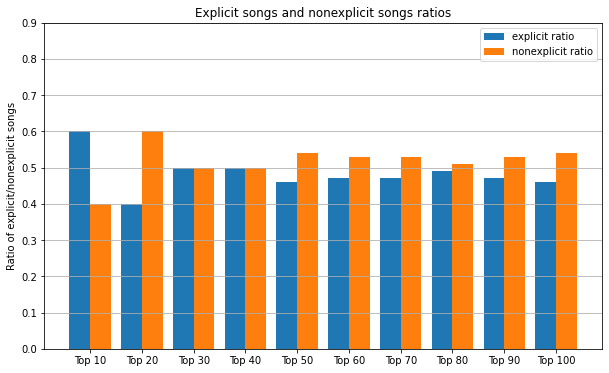

In [28]:
ind = np.arange(10)  # The x locations for the groups
width = 0.4  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
# The bars for the explicit songs ratios
ax.bar(ind - width/2, top_explicit['explicit_ratio'], width, label='explicit ratio')
# The bars for the nonexplicit songs ratios
ax.bar(ind + width/2, 1 - top_explicit['explicit_ratio'], width, label='nonexplicit ratio')

# Graph customisation
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(tops / 10 - 1)
ax.set_xticklabels([f'Top {top}' for top in tops])
ax.set_ylabel('Ratio of explicit/nonexplicit songs')
ax.set_title('Explicit songs and nonexplicit songs ratios')
ax.legend()
ax.grid(axis='y')

In conclusion, there are more explicit songs in the top 10, but in general there aren't more explicit songs in today's most popular songs.

## How related are acousticness and music energy?
<a href="https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/">According to Spotify</a>:
<br>
- <i><b>Acousticness</b> is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</i>
- <i><b>Energy</b> is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.</i>

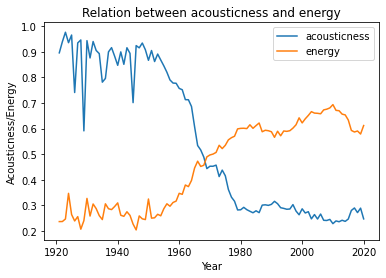

In [29]:
# Plot the mean of acousticness for every year
df.groupby('year')['acousticness'].mean().plot()
# Plot the mean of energy for every year
df.groupby('year')['energy'].mean().plot()

# Plot customisation
plt.xlabel('Year')
plt.ylabel('Acousticness/Energy')
plt.title('Relation between acousticness and energy')
plt.legend()

The <span style="color: blue">acousticness</span> seems to be roughly inverse proportionate to the music's <span style="color: orange">energy</span>.
<ul>
    <li>Between 1920 and 1950, the <span style="color: blue">acousticness</span> was above 0.5, while the <span style="color: orange">energy</span> was below 0.5.</li>
    <li>Between 1950 and 1980, the <span style="color: blue">acousticness</span> sinked, while the <span style="color: orange">energy</span> surged.</li>
    <li>Between 1980 and 2020, the <span style="color: blue">acousticness</span> was below 0.5, while the <span style="color: orange">energy</span> was above 0.5.</li>
</ul>

Only ~8% of the songs have both <span style="color: blue">acousticness</span> and <span style="color: orange">energy</span> over 0.5.

In [30]:
# Mask used for filtering out songs that have acousticness less than of equal to 0.5
mask1 = df['acousticness'] > 0.5
# Mask used for filtering out songs that have energy less than of equal to 0.5
mask2 = df['energy'] > 0.5

In [31]:
mask1
# mask2
# mask1 & mask2

0          True
1          True
2          True
3          True
4          True
          ...  
169904    False
169905    False
169906     True
169907    False
169908    False
Name: acousticness, Length: 169909, dtype: bool

In [32]:
acoustisc_and_energy1 = df[mask1 & mask2]
len(acoustisc_and_energy1) / len(df) * 100

8.237939132123666

Only ~13% of the songs have a sum of <span style="color: blue">acousticness</span> and <span style="color: orange">energy</span> over 1.25.

In [33]:
mask3 = df['acousticness'] + df['energy'] > 1.25
# The songs that have the sum of acousticness and energy over 1.25
acoustisc_and_energy2 = df[mask3]
acoustisc_and_energy2

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7,0.988,['Carl Woitschach'],0.555,153967,0.421,0,6OJjveoYwJdIt76y0Pxpxw,0.836000,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.857,1928
26,0.990,['Hafız Yaşar'],0.569,162197,0.327,0,6WFYaPHg3P8jQuh7x9YKYZ,0.947000,7,0.1340,-13.622,1,Kız Saçların,0,1928-05-07,0.0499,82.742,0.562,1928
35,0.989,['Perchicot'],0.769,140267,0.442,0,6ZWi1fuonJCUlt4p6o9Uzs,0.000001,2,0.1670,-12.697,0,La Noce À Rebecca,0,1928,0.2730,132.125,0.934,1928
46,0.985,['Francisco Canaro'],0.810,169160,0.300,0,6iInEwECoC9ZX8uPDRjyft,0.000885,4,0.1300,-9.702,1,Mariposa de Cabaret - Instrumental (Remasteriz...,0,1928-09-25,0.2890,115.648,0.806,1928
58,0.991,['Ignacio Corsini'],0.431,108573,0.315,0,6mlX2fWNqtclyBUAyBHNQ5,0.883000,11,0.1080,-21.753,0,Caido del Cielo - Remasterizado,0,1928-05-14,0.0464,65.735,0.711,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169818,0.876,['Demi Lovato'],0.557,227813,0.387,1,18ssFhD04lWo1RzpcohnrG,0.000000,11,0.1110,-6.338,1,Anyone,70,2020-01-27,0.0374,129.980,0.317,2020
169839,0.815,"['Freddie Gibbs', 'The Alchemist', 'Rick Ross']",0.523,244053,0.654,1,15NQ3x1f2GUhqs8oBXhTqp,0.000008,6,0.2110,-9.531,0,Scottie Beam,67,2020-05-29,0.2160,79.192,0.544,2020
169840,0.741,"['Freddie Gibbs', 'The Alchemist']",0.543,239027,0.551,1,5V9lnDn1hePoudMfKfCTNl,0.000054,1,0.5830,-10.380,1,God Is Perfect,67,2020-05-29,0.4370,75.932,0.638,2020
169850,0.932,['Ellie Goulding'],0.491,188733,0.367,0,54OjRoNNwpExHizhCKhddk,0.000876,10,0.1110,-7.164,1,Your Song,0,2020-06-05,0.0308,134.105,0.455,2020


In [34]:
# The percentace of songs that have the sum of acousticness and energy over 1.25
len(acoustisc_and_energy2) / len(df) * 100

13.160574189713317

In conclusion, <span style="color: blue">acousticness</span> and music <span style="color: orange">energy</span> are very related, in the way that they are roughly inverse proportionate. Generally, the lower one of the two features' value is, the higher the other feature's value will be, and vice versa.

## Can you classify a song to a decade?

In [35]:
df2 = df.copy(deep=True)
df2.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


Create a column that stores the decade of each song. For instance, a song released in 1997 belongs to the 1990s century. This will be achieved in 3 steps in the following order:
1) round the year down to the nearest ten  
2) convert the number into a string  
3) concatenate an "s" at the end of the string

In [36]:
df2['decade'] = (df2['year'] // 10 * 10).astype(str) + 's'

Decades that don't have more than 10,000 songs in the dataset will be filtered out, because 10,000 or less songs doesn't feel enough to train in order to classify a song to a decade.

In [37]:
# The number of occurences of each decade
decades_occurences = df2['decade'].value_counts()
decades_occurences

2000s    20000
1990s    20000
1960s    20000
1980s    20000
1970s    20000
1950s    19950
2010s    19900
1940s    14968
1930s     8889
1920s     4446
2020s     1756
Name: decade, dtype: int64

In [38]:
# Filter out the songs that belong to a decade that don't have more than 10000 songs
df2 = df2.set_index('decade').loc[decades_occurences > 10000].reset_index()

A model can be chosen and trained, but before that, the following will be done:
1) A list with relevant features and one with the target will be created.  
2) A DataFrame with the futures and one with the target will be created.  
3) The features DataFrame will be splitted into a training set and a testing set, while the target DataFrame will also be splitted into a set dataset and a testing set.

In [39]:
# List the columns of the dataset
df2.columns

Index(['decade', 'acousticness', 'artists', 'danceability', 'duration_ms',
       'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness',
       'tempo', 'valence', 'year'],
      dtype='object')

In [40]:
# Features used for training the model
features = [
    'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence']
# The target feature (the feature that will be predicted)
target = ['decade']

# The DataFrame with the features used for training the model
X = df2[features]
# The DataFrame containing the target feature
y = df2[target]

In [41]:
X.head()
# y.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.947,0.590,0.441,0.19100,0.2140,-8.765,0.0445,77.988,0.411
1,0.904,0.737,0.557,0.00193,0.0654,-4.709,0.0473,131.353,0.930
2,0.252,0.750,0.153,0.00000,0.3930,-16.563,0.9500,60.051,0.602
3,0.965,0.295,0.346,0.00000,0.1410,-12.177,0.0585,82.392,0.476
4,0.905,0.642,0.320,0.00000,0.0969,-8.493,0.0711,122.134,0.690


In [42]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

In [43]:
# Use a decision tree calassifier as the model
dtc = DecisionTreeClassifier(max_depth=5)

In [44]:
# Fit the model with the training set
dtc.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(max_depth=5)

Now that the model was created and trained, its performance can be tested.

In [45]:
# Numpy array with the predictions of X_test
predictions = dtc.predict(X_test)
predictions

array(['1950s', '1970s', '1970s', ..., '1970s', '2000s', '1940s'],
      dtype=object)

In [46]:
# DataFrame comparing the predicted values with the actual values for the first 15 examples
pd.DataFrame([predictions[:15], y_test['decade'][:15]], ['predicted', 'actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
predicted,1950s,1970s,1970s,2000s,1980s,1950s,1950s,2010s,1960s,2010s,1950s,1950s,1980s,1960s,2010s
actual,1950s,2000s,1980s,1960s,1980s,1940s,1980s,1990s,1960s,1970s,1940s,1960s,1980s,1990s,2000s


In [47]:
# Accuracy percentage
accuracy_score(y_test, predictions) * 100

33.58954484778022

The accuracy score is roughly 34%, which is not bad at all taking in consideration that there are songs realeased in a century that are indistinguishable from songs in other centuries. For example, a song released in 1999 can easily be more similar to the songs of the 2000s than those of the 1990s.

The performance of the model can be visualized on a graph. First, the decades will be converted into integers, so that the values can be plotted (for instance, the string "2000s" will become the integer "2000").

In [48]:
# Convert the decades to integers
preds_to_df = [int(pred[:4]) for pred in predictions]
actual_to_df = y_test['decade'].str.slice(0, 4).astype('int')

Create a DataFrame that contains a column of predictions and a column of their actual values, then plot the predictions and the actual values on a graph.

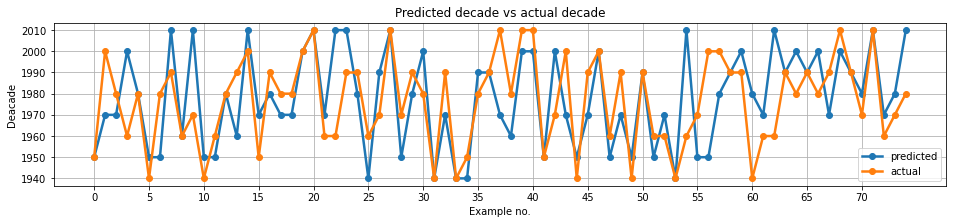

In [31]:
# DataFrame containing predictions and their actual values
preds_vs_actual = pd.DataFrame([preds_to_df, actual_to_df], ['predicted', 'actual']).transpose()
preds_vs_actual[:75].plot(figsize=(16, 3), linewidth=2.5, marker="o")

plt.title('Predicted decade vs actual decade')
# Add labels on the x and y axis
plt.xlabel('Example no.')
plt.ylabel('Deacade')
# Set the current tick location of the x axis to increment by 5 from 0 to 75
plt.xticks(np.arange(0, 75, 5))
plt.grid()